In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [ ]:
df = pd.read_csv('googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Из информации о датафрейме мы можем видеть, что отсутствуют данные и что типы данных объектов не идентифицируются надлежащим образом.
Нужно обработать значения, которые отсутствуют и изменить тип данных

In [ ]:
df.isnull().sum().sort_values(ascending=False)

Rating            1474
Current Ver          8
Android Ver          3
Type                 1
Content Rating       1
App                  0
Category             0
Reviews              0
Size                 0
Installs             0
Price                0
Genres               0
Last Updated         0
dtype: int64

Видим что в колонке Rating отсутствует много данных


In [ ]:
# Удаляем отсутствующие значения
df.dropna(how="any",inplace=True)
df.isnull().sum().sort_values(ascending=False)

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [ ]:
# Проверяем на дубликаты
df.duplicated().sum()

474

In [ ]:
# Убираем дубликаты
df.drop_duplicates(inplace=True)
df=df.reset_index(drop=True)

In [ ]:
# Смотрим уникальные значения в столбце "Size"
df["Size"].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

для смены типа данныx в столбце "Size" нам необходимо убрать все лишнее (M, k, Varies with device) и перевести мб и кб


In [ ]:
df["Size"]=df["Size"].replace("Varies with device",np.nan)

In [ ]:
def convert_size(size):
  if isinstance(size,str):
    value=float(re.findall(r"\d+\.*\d*",size)[0])
    unit=size[-1]
    if unit=="M":
      return value
    elif unit=="k":
      return value/1024
    raise ValueError("Не верный формат размера")

converted_sizes=[]
for size in df["Size"].tolist():
    converted_size=convert_size(size)
    converted_sizes.append(converted_size)

df["df_size_new"] = pd.DataFrame({"Converted Size (MB)": converted_sizes})

In [ ]:
df.isnull().sum()

App                  0
Category             0
Rating               0
Reviews              0
Size              1468
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
df_size_new       1468
dtype: int64

In [ ]:
df.dropna(inplace=True)
df=df.reset_index(drop=True)
df.shape

(7418, 14)

In [ ]:
# Приведем в порядок столбцы "Installs" и "Price"
print(df["Installs"].unique())
print(df["Price"].unique())

['10,000+' '500,000+' '5,000,000+' '50,000,000+' '100,000+' '50,000+'
 '1,000,000+' '10,000,000+' '5,000+' '100,000,000+' '1,000+'
 '500,000,000+' '100+' '500+' '10+' '1,000,000,000+' '5+' '50+' '1+']
['0' '$4.99' '$6.99' '$7.99' '$3.99' '$5.99' '$2.99' '$1.99' '$9.99'
 '$0.99' '$9.00' '$5.49' '$10.00' '$24.99' '$11.99' '$79.99' '$16.99'
 '$14.99' '$29.99' '$12.99' '$3.49' '$10.99' '$7.49' '$1.50' '$19.99'
 '$15.99' '$33.99' '$39.99' '$2.49' '$4.49' '$1.70' '$1.49' '$3.88'
 '$399.99' '$17.99' '$400.00' '$3.02' '$1.76' '$4.84' '$4.77' '$1.61'
 '$1.59' '$6.49' '$1.29' '$299.99' '$379.99' '$37.99' '$18.99' '$389.99'
 '$8.49' '$1.75' '$14.00' '$2.00' '$3.08' '$2.59' '$19.40' '$15.46'
 '$8.99' '$3.04' '$13.99' '$4.29' '$3.28' '$4.60' '$1.00' '$2.90' '$1.97'
 '$2.56' '$1.20']


In [ ]:
cols=["Installs","Price"]
signs=["+",",","$"]

for col in cols:
  for sign in signs:
    df[col]=df[col].apply(lambda x:x.replace(sign,""))

In [ ]:
# Удаляем столбец "Size"
df.drop(columns="Size",inplace=True,axis=1)

In [ ]:
df.head()

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,df_size_new
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7418 entries, 0 to 7417
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             7418 non-null   object 
 1   Category        7418 non-null   object 
 2   Rating          7418 non-null   float64
 3   Reviews         7418 non-null   object 
 4   Installs        7418 non-null   object 
 5   Type            7418 non-null   object 
 6   Price           7418 non-null   object 
 7   Content Rating  7418 non-null   object 
 8   Genres          7418 non-null   object 
 9   Last Updated    7418 non-null   object 
 10  Current Ver     7418 non-null   object 
 11  Android Ver     7418 non-null   object 
 12  df_size_new     7418 non-null   float64
dtypes: float64(2), object(11)
memory usage: 753.5+ KB


In [ ]:
# Меняем тип данных в столбцах
df["Reviews"]=df["Reviews"].astype(float)
df["Installs"]=df["Installs"].astype(float)
df["Price"]=df["Price"].astype(float)
df["df_size_new"]=df["df_size_new"].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7418 entries, 0 to 7417
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             7418 non-null   object 
 1   Category        7418 non-null   object 
 2   Rating          7418 non-null   float64
 3   Reviews         7418 non-null   float64
 4   Installs        7418 non-null   float64
 5   Type            7418 non-null   object 
 6   Price           7418 non-null   float64
 7   Content Rating  7418 non-null   object 
 8   Genres          7418 non-null   object 
 9   Last Updated    7418 non-null   object 
 10  Current Ver     7418 non-null   object 
 11  Android Ver     7418 non-null   object 
 12  df_size_new     7418 non-null   float64
dtypes: float64(5), object(8)
memory usage: 753.5+ KB


In [ ]:
df.describe()

,Rating,Reviews,Installs,Price,df_size_new
count,7418.000000,7.418000e+03,7.418000e+03,7418.000000,7418.000000
mean,4.171394,2.789961e+05,7.830035e+06,1.117168,22.760481
std,0.549812,1.744309e+06,4.632233e+07,17.715707,23.439539
min,1.000000,1.000000e+00,1.000000e+00,0.000000,0.008301
25%,4.000000,9.900000e+01,1.000000e+04,0.000000,5.100000
50%,4.300000,2.067500e+03,1.000000e+05,0.000000,14.000000
75%,4.500000,3.690075e+04,1.000000e+06,0.000000,33.000000
max,5.000000,4.489389e+07,1.000000e+09,400.000000,100.000000


<Axes: title={'center': 'Распределение рейтинга'}>

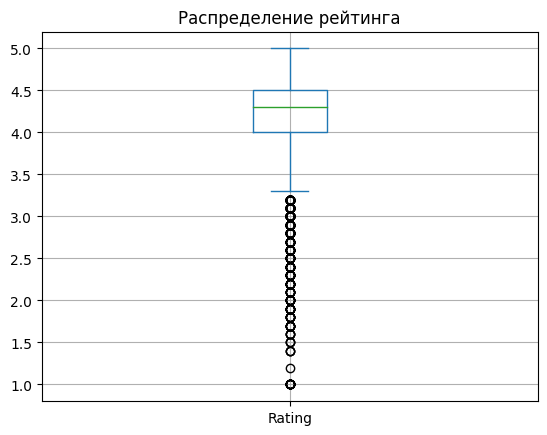

In [ ]:
df[['Rating']].plot(kind='box',
  title='Распределение рейтинга', grid=True)

In [ ]:
# По графику наблюдаем, что основное колличество оценок находится на интервале от 3,5 до 5 и есть незначительное кол-во выбросов в виде низких оценок.
# В большей степени пользователи предпочитают ставить оценки от 4 до 4,5

Соотношение платных и бесплатных приложений

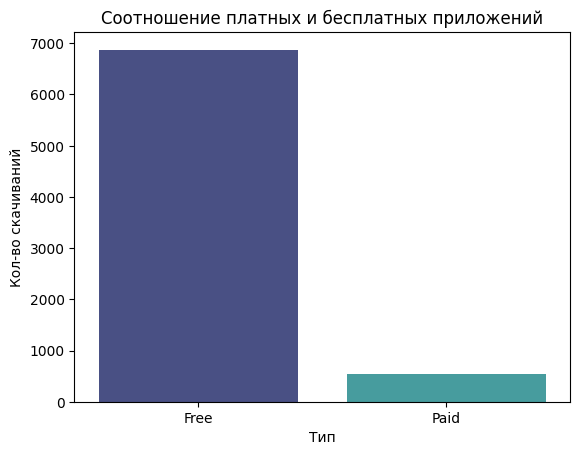

In [ ]:
sns.countplot(data=df,x=df["Type"],palette="mako")
plt.title("Соотношение платных и бесплатных приложений")
plt.xlabel('Тип')
plt.ylabel('Кол-во скачиваний')
plt.show()

In [ ]:
# По графику мы видим, что пользователи предпичитают скачивать больше бесплатные приложения, чем платные

Зависимость кол-ва скачиваний и рейтинга

<Axes: title={'center': 'Зависимость кол-ва скачиваний и рейтинга'}, xlabel='Rating', ylabel='Installs'>

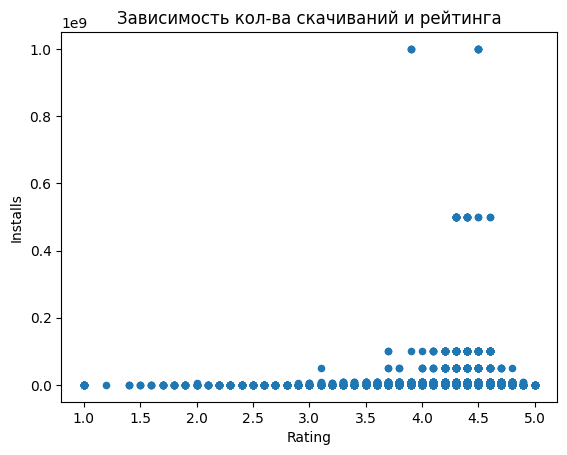

In [ ]:
df.plot(kind='scatter',
        x='Rating',
        y='Installs',
        title='Зависимость кол-ва скачиваний и рейтинга')

In [ ]:
# Наблюдается зависимость, что чем выше рейтинг приложений, тем больше скачиваний и наоборот

Наибольший рейтинг по категориям

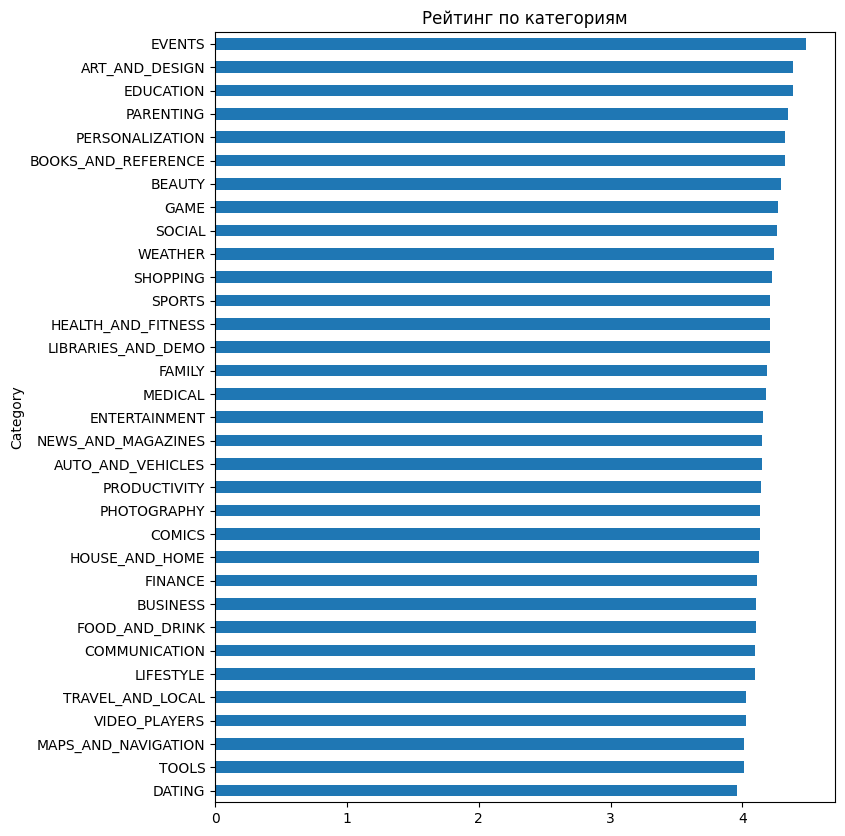

In [ ]:
plt.figure(figsize=(8,10))
df.groupby("Category")["Rating"].mean().sort_values().plot(kind="barh")
plt.title("Рейтинг по категориям")
plt.show()

In [ ]:
# По графику наблюдаем что высший рейтинг имеют приложения категории Events, а худший рейтинг приложения категории Dating

Соотношение цены и рейтинга

<Figure size 800x600 with 0 Axes>

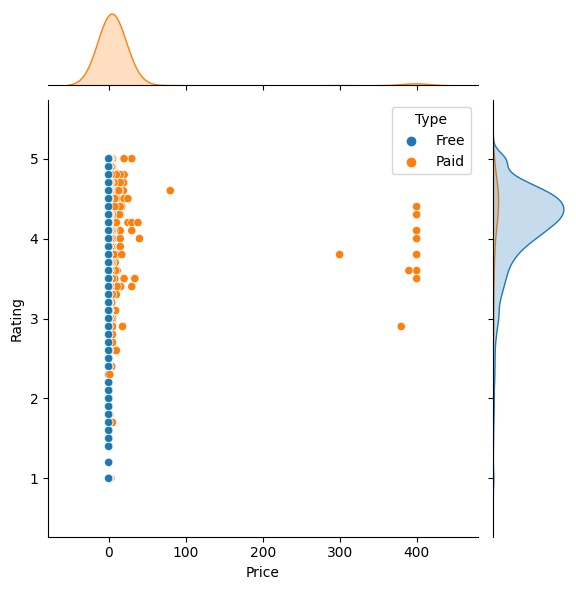

In [ ]:
plt.figure(figsize=(8,6))
sns.jointplot(df,y="Rating",x="Price",color="green",hue="Type")
plt.show()

In [ ]:
# На графике мы можем наблюдать, что платные и бесплатные приложения  в большей степени имеют высокий рейтинг.
# Стоимость большенства приложений не привышает 100$, но есть и приложения, цена которых составляет 400$###

Heatmap

<ipython-input-32-02865cdfc9a8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


Text(0.5, 1.0, 'Heatmap')

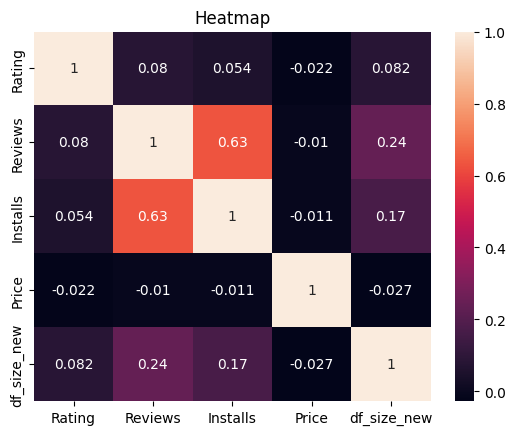

In [ ]:
sns.heatmap(df.corr(),annot=True)
plt.title("Heatmap")

In [ ]:
# Из приведенной выше тепловой карты мы можем видеть, что существует положительная корреляция между установками и отзывами.

Pair plot (scatter plot matrix)

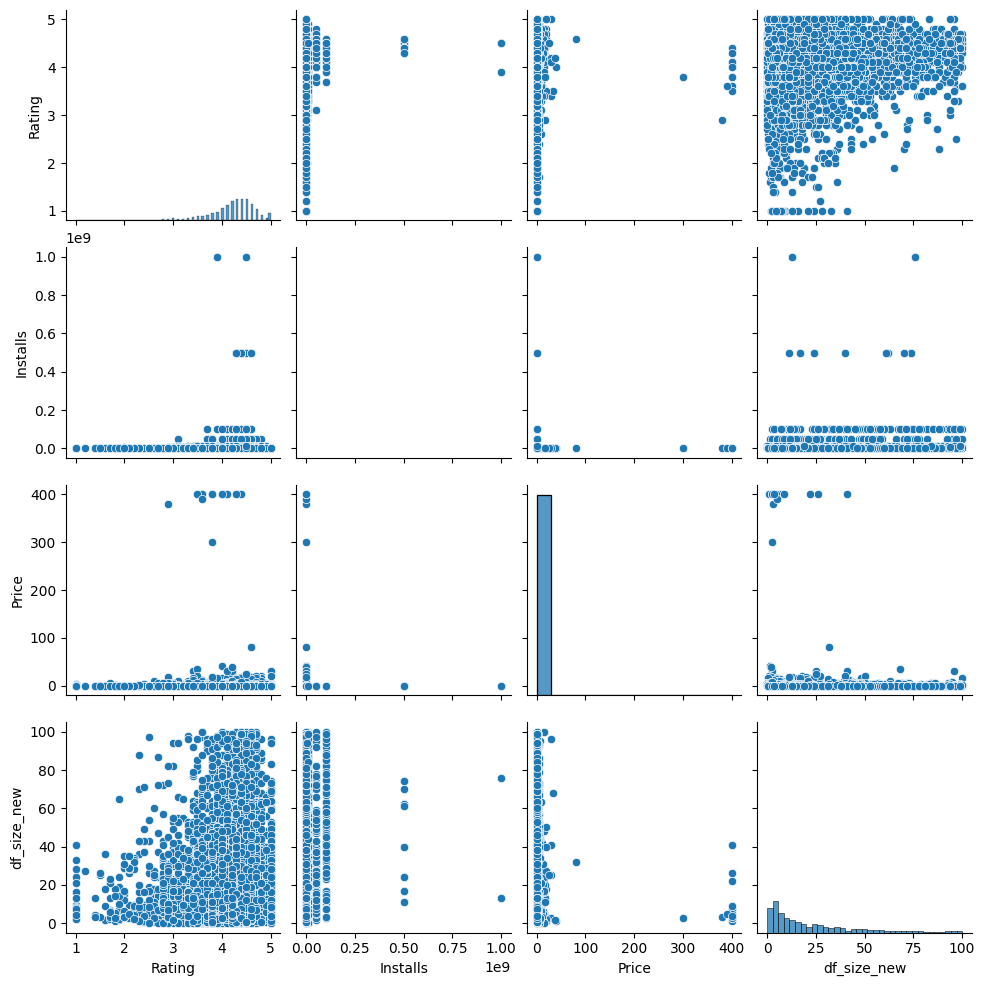

In [ ]:
sns.pairplot(df[['Rating', 'Installs', 'Price', 'df_size_new']])

Сравним рейтинг для топ-5 крупнейших категорий при помощи `boxplot`.

<Axes: xlabel='Category', ylabel='Rating'>

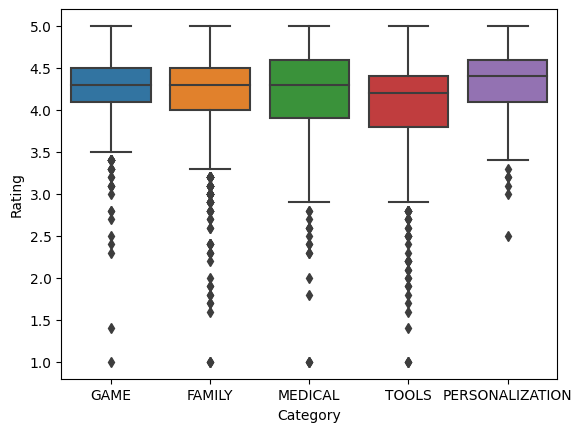

In [ ]:
top_category = df['Category'].value_counts().sort_values(ascending=False).head(5).index.values
top_category
sns.boxplot(x="Category", y="Rating",
            data=df[df['Category'].isin(top_category)])